In [235]:
import json
import matplotlib.pyplot as plt

In [236]:
# info_path = ('../trained_models/env.virtualhome/task.find-numproc.1-obstype.full-sim.unity/'
#              'mode.RL-algo.a2c-attention.linear-gamma.0.95-lr1e-05/log.json')

info_path = ('../trained_models/env.virtualhome/task.find-numproc.1-obstype.full-sim.unity/taskset.setup_table/mode.RL-algo.a2c-attention.linear-gamma.0.95-lr1e-05/log.json')


In [237]:
with open(info_path, 'r') as f:
    content = json.load(f)

In [238]:
content[0].keys()

dict_keys(['success', 'reward', 'script', 'target', 'info_step'])

In [239]:
def get_target_obj(info_elem):
    return (info_elem['target'][1][0][0]['class_name'])



## Success over episode

In [240]:
obj_and_success = [(get_target_obj(elem), elem['success']) for elem in content]

In [241]:
different_classes = set([x[0] for x in obj_and_success])

In [242]:
success_per_class = {x: [0] for x in different_classes}
cnt_per_class = {x: [0] for x in different_classes}
for item in obj_and_success:
    for cn in different_classes:
        last_el = success_per_class[cn][-1]
        last_elct = cnt_per_class[cn][-1]
        if item[0] == cn:
            cnt_per_class[cn].append(last_elct + 1)
        else:
            cnt_per_class[cn].append(last_elct)
            
        if item[0] != cn or not item[1]:
            success_per_class[cn].append(last_el)
        else:
            success_per_class[cn].append(last_el + 1)


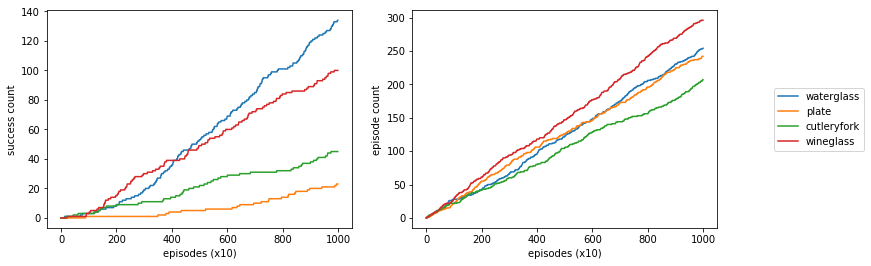

In [243]:
plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
for cn in different_classes:
    ax.plot(success_per_class[cn], label=cn)
    ax.set_ylabel('success count')
    ax.set_xlabel('episodes (x10)')
    
ax = plt.subplot(1,2,2)
for cn in different_classes:
    ax.plot(cnt_per_class[cn], label=cn)
    ax.set_ylabel('episode count')
    ax.set_xlabel('episodes (x10)')

plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

## Behavior of the policy

In [234]:
num_ep = -4
print(get_target_obj(content[num_ep]))
num_steps = len(content[num_ep]['script'])
for step in range(num_steps):
    print(content[num_ep]['script'][step], content[-6]['info_step'][step][0]['center'])

plate
None [-0.1454117, 0.901332557, 0.7600003]
None [-0.1454117, 0.901332557, 0.7600003]
None [-0.1454117, 0.901332557, 0.7600003]
[walkto]  <wineglass> (356) [-0.1454117, 0.901332557, 0.7600003]
[grab]  <wineglass> (356) [-0.1454117, 0.901332557, 0.7600003]
None [-1.07302213, 0.9219994, 0.485898465]
None [-1.07302213, 0.9219994, 0.485898465]
None [-0.902957141, 0.8582664, 0.634212255]


IndexError: list index out of range

In [134]:
content[-6]['info_step'][step]

[{'center': [1.99651885, 0.913130939, 0.931264937],
  'size': [0.5003667, 1.81224072, 0.874497056]},
 [['bathroom', 173, 'INSIDE'], ['stall', 191, 'CLOSE'], ['rug', 209, 'CLOSE']]]